In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [4]:
df = pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0


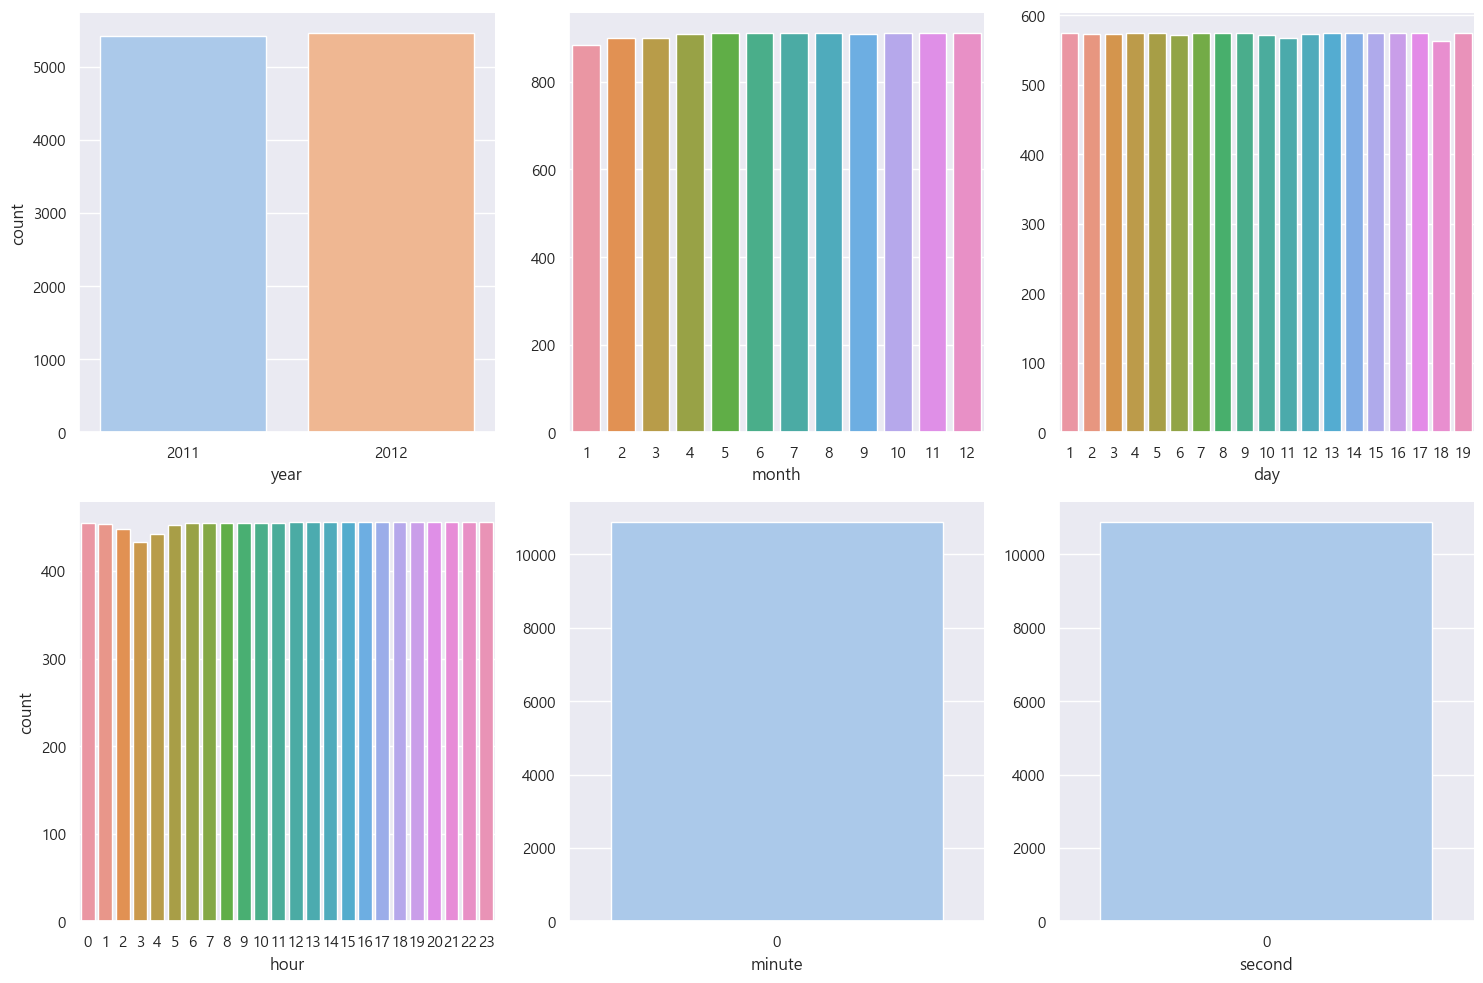

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='year')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='month')
plt.ylabel("")

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='day')
plt.ylabel("")

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='hour')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='minute')
plt.ylabel("")

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='second')
plt.ylabel("")

plt.tight_layout()
plt.show()

In [22]:
col = df.columns.tolist()
col.remove("count")
col.remove("datetime")
print(col)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute', 'second']


In [24]:
df_x = df[col]
df_y = df["count"]
df_x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0


In [25]:
df_x, df_y = df_x.values, df_y.values
df_x

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 4.,  0.,  1., ..., 21.,  0.,  0.],
       [ 4.,  0.,  1., ..., 22.,  0.,  0.],
       [ 4.,  0.,  1., ..., 23.,  0.,  0.]])

In [27]:
train_input, test_input, train_target, test_target = train_test_split(df_x, df_y, test_size=0.2)

In [28]:
model = LinearRegression()
model.fit(train_input, train_target)

LinearRegression()

In [29]:
predictions = model.predict(test_input)
predictions

array([141.,  13., 420., ..., 168.,  22., 554.])

In [31]:
test_target - predictions

array([-1.13686838e-13, -2.48689958e-13,  2.27373675e-13, ...,
       -5.68434189e-14, -2.23820962e-13,  2.27373675e-13])

In [36]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
MSE(test_target, predictions)

7.362617456254753e-26

In [37]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse
RMSE(test_target,predictions)

2.7134143539560547e-13

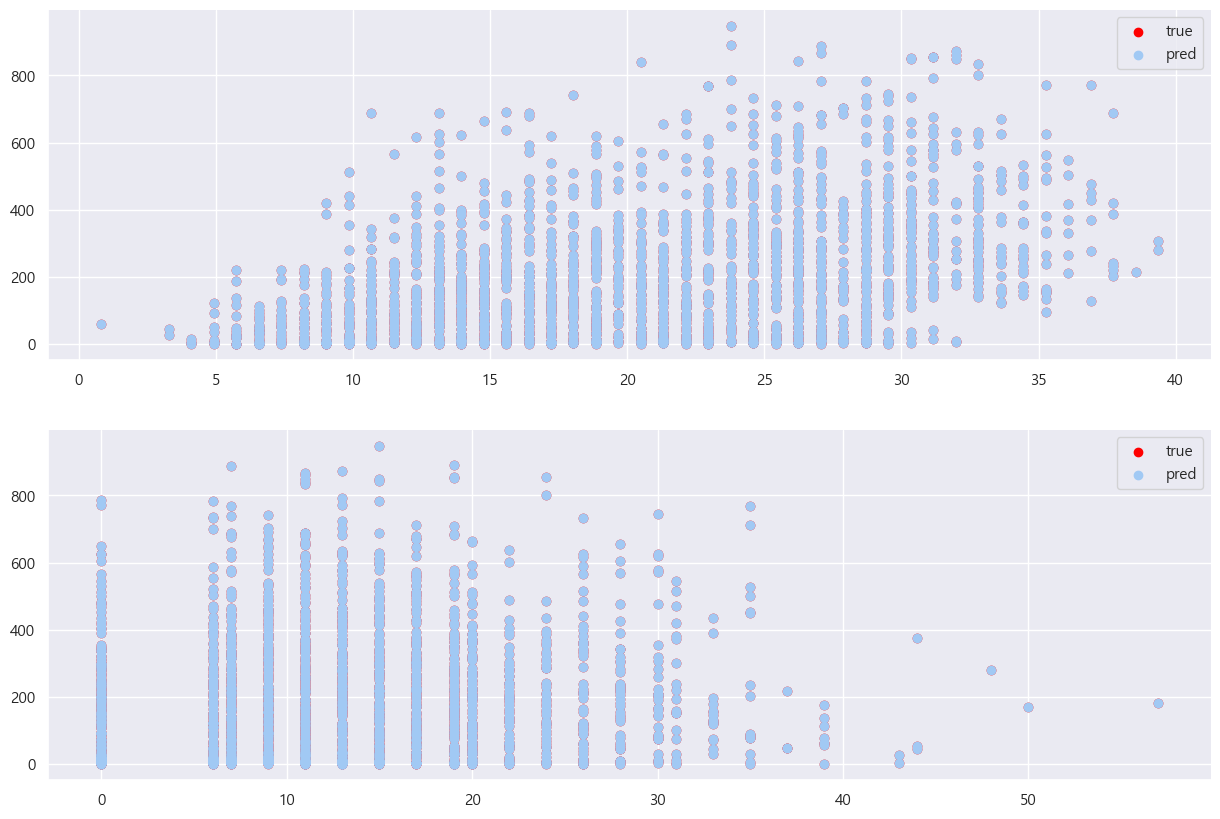

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.scatter(test_input[:, 4], test_target, label="true", color = "red")
plt.scatter(test_input[:, 4], predictions, label="pred")
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(test_input[:, 7], test_target, label="true", color = "red")
plt.scatter(test_input[:, 7], predictions, label="pred")
plt.legend()

plt.show()